In [287]:
# Libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.linear_model import LinearRegression
import numpy as np

In [289]:
# Set Working Directory
os.chdir("C:/")


In [291]:
# Define Functions

# Function to rename columns by extracting country names
def rinomina(df):
    new_colnames = [re.sub(r".*reported.by.insurance.corporations.in.|..stocks.*", "", col) for col in df.columns]
    new_colnames[0:2] = ["DATE", "TIME.PERIOD"]  # First two columns are "DATE" and "TIME.PERIOD"
    df.columns = new_colnames
    return df

# Function to read multiple CSV files into dataframes
def read_csv_liste(lista_file):
    dataframes = {}
    for file in lista_file:
        # Remove the ".csv" extension for the dataframe name
        nome_df = file.replace(".csv", "")
        
        # Read the file into a dataframe and store in dictionary
        dataframes[nome_df] = pd.read_csv(file)
        print(f"Creato dataframe: {nome_df}")
    return dataframes

# Function to rename columns keeping only country names
def rinomina_colonne(df):
    col_names_modificati = [re.sub(r".*?\s+([A-Za-z]+)\s*\(.*", r"\1", col) for col in df.columns]
    df.columns = col_names_modificati
    return df


In [293]:
# Load and Rename DataFrames
lista_file = [file for file in os.listdir() if file.endswith('.csv')]
dataframes = read_csv_liste(lista_file)

# Apply column renaming function to each dataframe
for name, df in dataframes.items():
    dataframes[name] = rinomina_colonne(df)

# Remove Slovakia from A80 dataframe if it exists
if "A80" in dataframes and "Slovakia" in dataframes["A80"].columns:
    dataframes["A80"].drop(columns=["Slovakia"], inplace=True)

for name, df in dataframes.items():
    dataframes[name] = df.dropna()


Creato dataframe: A10
Creato dataframe: A20
Creato dataframe: A30
Creato dataframe: A40
Creato dataframe: A50
Creato dataframe: A60
Creato dataframe: A70
Creato dataframe: A80
Creato dataframe: GDP
Creato dataframe: HICP
Creato dataframe: L20
Creato dataframe: L30
Creato dataframe: L40
Creato dataframe: L50
Creato dataframe: L51
Creato dataframe: L70
Creato dataframe: T00


In [295]:
# Rename and Load GDP Data
GDP = pd.read_csv("GDP.csv").iloc[268:302]  # Selecting rows as in R code
new_colnames = [re.sub(r".*MNA\.Q\.Y\.|\.W2.*", "", col) for col in GDP.columns]

# Map country codes to names
mappatura_paesi = {
    "AT": "Austria", "BE": "Belgium", "CY": "Cyprus", "DE": "Germany", "EE": "Estonia", 
    "ES": "Spain", "FI": "Finland", "FR": "France", "GB": "United Kingdom", "GR": "Greece", 
    "IT": "Italy", "LT": "Lithuania", "LU": "Luxembourg", "LV": "Latvia", "MT": "Malta",
    "NL": "Netherlands", "PT": "Portugal", "SI": "Slovenia", "IE": "Ireland", "HR": "Croatia",
    "BG": "Bulgaria", "CZ": "Czech Republic", "HU": "Hungary", "PL": "Poland", "RO": "Romania", 
    "SE": "Sweden", "SK": "Slovakia", "DK": "Denmark"
}

# Rename columns in GDP
new_colnames = [mappatura_paesi.get(col, col) for col in new_colnames]
new_colnames[0:2] = ["DATE", "TIME PERIOD"]
GDP.columns = new_colnames
GDP = GDP.loc[:, ~GDP.columns.isna()]
GDP = GDP.iloc[2:34]  # Further slicing as in R code


In [297]:
# Rename and Load HICP Data
HICP = pd.read_csv("HICP.csv").iloc[342:441]
HICP = HICP.iloc[::3, :]  # Selecting rows with a step of 3

# Rename columns in HICP
new_colnames = [re.sub(r".*ICP\.M\.|\.N.*", "", col) for col in HICP.columns]
new_colnames = [mappatura_paesi.get(col, col) for col in new_colnames]
new_colnames[0:2] = ["DATE", "TIME PERIOD"]
HICP.columns = new_colnames
HICP = HICP.loc[:, ~HICP.columns.isna()]


In [341]:
# Plotting Functions
# Function to plot time series and improved trend line
def plot_time_series_fixed(larghezza, altezza,data_dict, title_suffix="T00"):
    plt.figure(figsize=(larghezza, altezza))
    for i, (country, data) in enumerate(data_dict.items(), start=1):
        plt.subplot(2, 3, i)
        
        # Plot the original data
        plt.plot(data.values, color='blue', linewidth=2, label="Data")
        
        # Generate trend line using a linear model
        X = np.arange(len(data)).reshape(-1, 1)  # Create index array for X-axis
        y = data.values.reshape(-1, 1)  # Reshape y data
        
        # Fit the linear regression model
        model = LinearRegression().fit(X, y)
        trend_line = model.predict(X)
        
        # Plot the trend line
        plt.plot(X, trend_line, color='red', linewidth=2, linestyle='--', label="Trend Line")
        
        # Add labels and title
        plt.title(f"Trend Line for {country} ({title_suffix})")
        plt.xlabel("Time")
        plt.ylabel("Value")
        plt.legend()
        
    plt.tight_layout()
    plt.show()


# Function to plot histograms
def plot_histograms(data_dict, title_suffix="T00"):
    plt.figure(figsize=(15, 10))
    for i, (country, data) in enumerate(data_dict.items(), start=1):
        plt.subplot(2, 3, i)
        plt.hist(data, color='blue', edgecolor='black')
        plt.title(f"Histogram for {country} ({title_suffix})")
        plt.xlabel("Value")
    plt.tight_layout()
    plt.show()


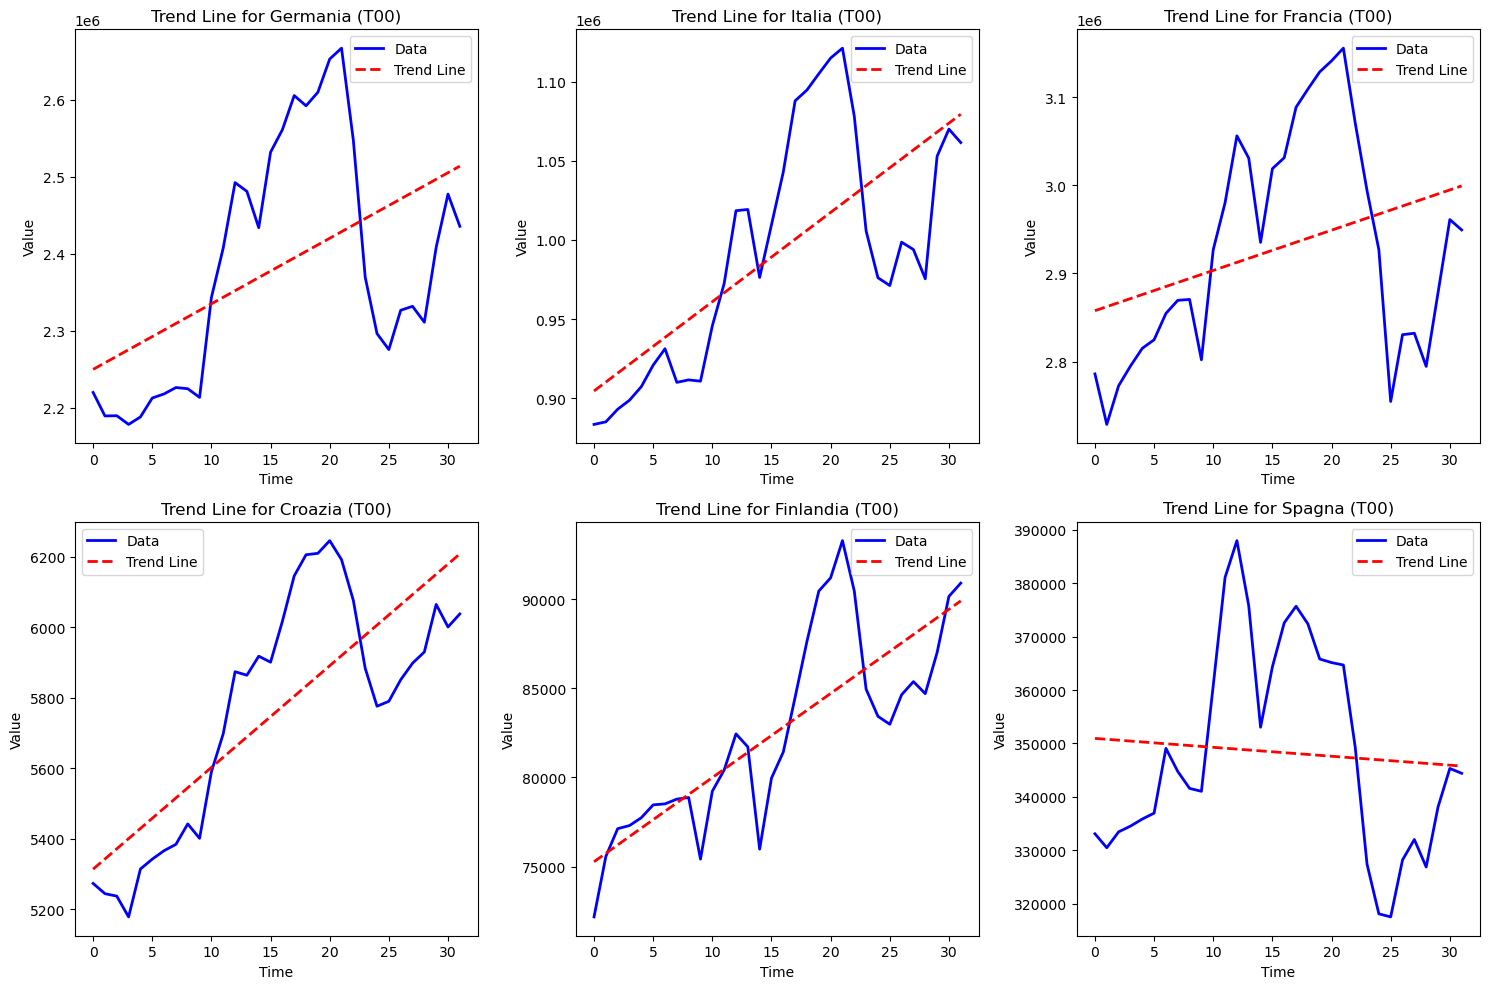

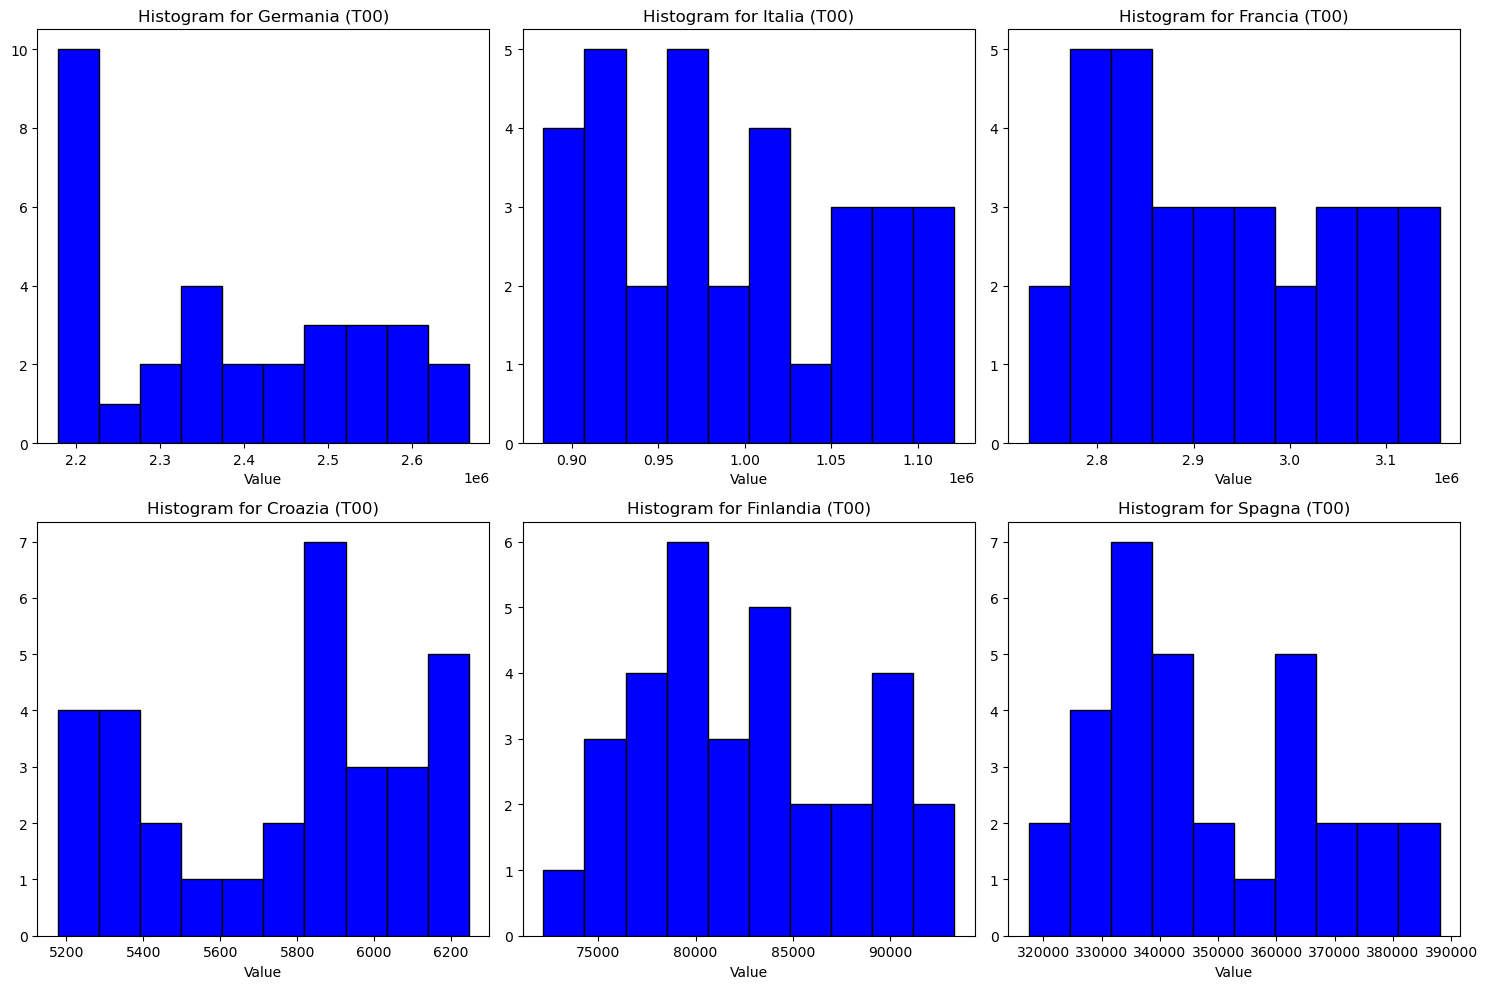

In [344]:
# Plot T00

# Extract and clean T00 data
T00 = dataframes["T00"]
data_T00 = {
    "Germania": T00["Germany"].dropna().iloc[:32],
    "Italia": T00["Italy"].dropna().iloc[:32],
    "Francia": T00["France"].dropna().iloc[:32],
    "Croazia": T00["Croatia"].dropna().iloc[:32],
    "Finlandia": T00["Finland"].dropna().iloc[:32],
    "Spagna": T00["Spain"].dropna().iloc[:32]
}

plot_time_series_fixed(15,10,data_T00, title_suffix="T00")
plot_histograms(data_T00, title_suffix="T00")


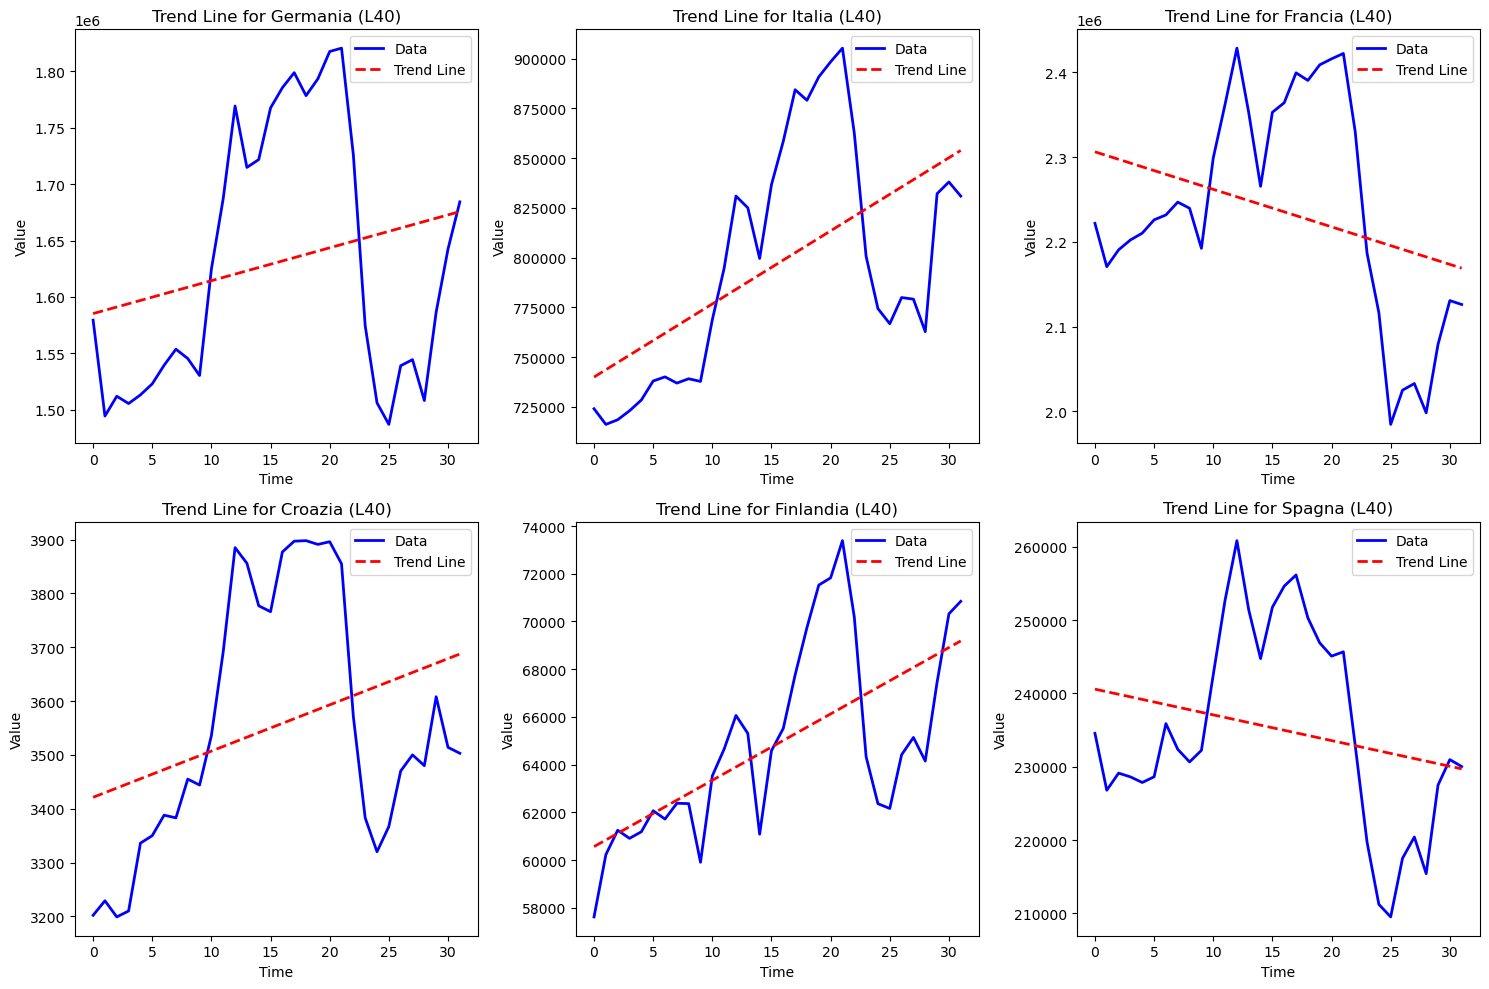

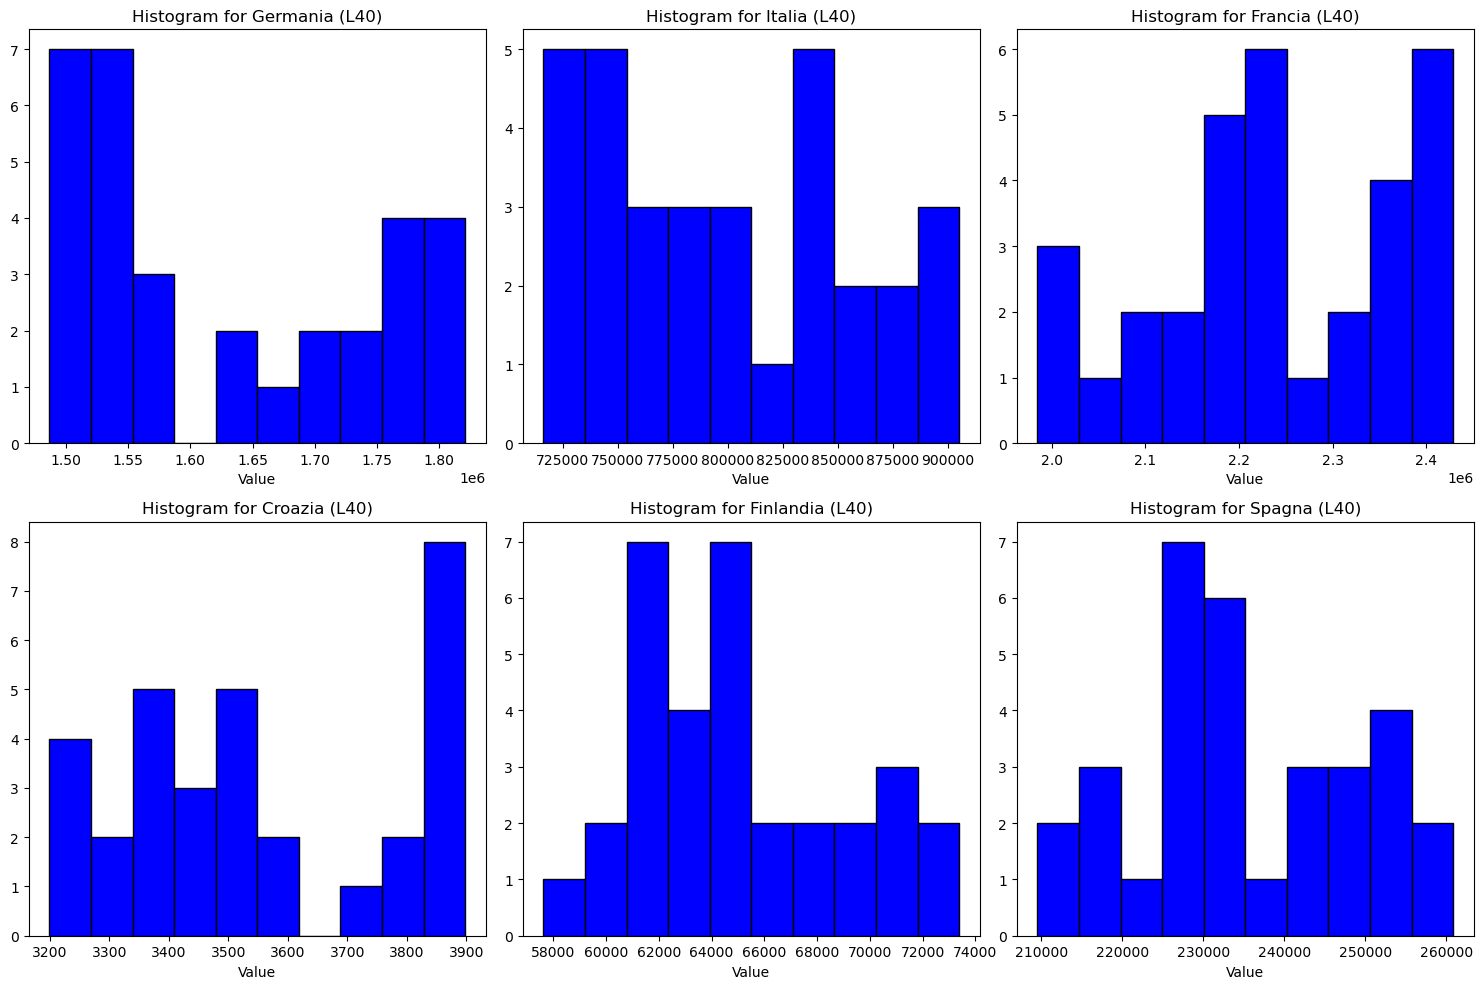

In [346]:
# Plot L40 Data

# Extract and clean L40 data
L40 = dataframes["L40"]
data_L40 = {
    "Germania": L40["Germany"].dropna().iloc[:32],
    "Italia": L40["Italy"].dropna().iloc[:32],
    "Francia": L40["France"].dropna().iloc[:32],
    "Croazia": L40["Croatia"].dropna().iloc[:32],
    "Finlandia": L40["Finland"].dropna().iloc[:32],
    "Spagna": L40["Spain"].dropna().iloc[:32]
}

plot_time_series_fixed(15, 10 , data_L40, title_suffix="L40")
plot_histograms(data_L40, title_suffix="L40")


In [ ]:
######################################################################################################################################################################################################################################

In [ ]:
#### Parte Model

In [247]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [32]:
# Lista di paesi per l'analisi
paesi = [
    "Austria", "Belgium", "Cyprus", "Estonia", "Finland", "France", "Germany", "Greece",
    "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta", "Netherlands",
    "Portugal", "Slovenia", "Spain"
]

In [34]:
# Selezione finale dei paesi

paesi = ["Italy", "Spain"]

In [243]:
# Dataframe per unire tutti i dati
data_all_paesi = pd.DataFrame()

# Ciclo per ogni paese per costruire il dataset
for paese in paesi:
    temp_df = pd.DataFrame({
      "Anno": dataframes["T00"]["DATE"].loc[dataframes["T00"][paese].notna()][:32],  # Prime 32 osservazioni
      "T00": dataframes["T00"][paese].dropna().values[:32],
      "GDP": GDP[paese].dropna()[:32].values,
      "HICP": HICP[paese][:32].values,
      "A10": dataframes["A10"][paese].dropna().values[:32],
      "A20": dataframes["A20"][paese].dropna().values[:32],
      "A30": dataframes["A30"][paese].dropna().values[:32],
      "A40": dataframes["A40"][paese].dropna().values[:32],
      "A50": dataframes["A50"][paese].dropna().values[:32],
      "A60": dataframes["A60"][paese].dropna().values[:32],
      "A70": dataframes["A70"][paese].dropna().values[:32],
      "A80": dataframes["A80"][paese].dropna().values[:32],
      "L20": dataframes["L20"][paese].dropna().values[:32],
      "L30": dataframes["L30"][paese].dropna().values[:32],
      "L40": dataframes["L40"][paese].dropna().values[:32],
      "L50": dataframes["L50"][paese].dropna().values[:32],
      "L51": dataframes["L51"][paese].dropna().values[:32],
      "L70": dataframes["L70"][paese].dropna().values[:32],
      "Paese": [paese] * 32
    })
    data_all_paesi = pd.concat([data_all_paesi, temp_df], ignore_index=True)

In [285]:
# Modello GLM con tutti i paesi e tutte le variabili
data_all_paesi['T00_L40'] = data_all_paesi['T00'] / data_all_paesi['L40']
model_glm = smf.glm(
    formula='T00_L40 ~ HICP + L20 + L30 + A20 + A30 + A40 + A50 + A60 + A70 + A80 + C(Anno) + C(Paese)',
    data=data_all_paesi,
    family=sm.families.Gamma(link=sm.families.links.log())
).fit()

print(model_glm.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                T00_L40   No. Observations:                   64
Model:                            GLM   Df Residuals:                       21
Model Family:                   Gamma   Df Model:                           42
Link Function:                    log   Scale:                      3.1497e-05
Method:                          IRLS   Log-Likelihood:                 242.80
Date:                Sat, 26 Oct 2024   Deviance:                   0.00066146
Time:                        18:21:21   Pearson chi2:                 0.000661
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.09

C:\Users\andry\Anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


In [283]:
# Modello Lineare con tutti i paesi
model_lm = smf.ols(
    formula='T00_L40 ~ HICP + L20 + L30 + A20 + A30 + A40 + A50 + A60 + A70 + A80 + C(Anno) + C(Paese)',
    data=data_all_paesi
).fit()

print(model_lm.summary())

# Calcolo della VIF (fattore di inflazione della varianza)
vif_data = pd.DataFrame()
vif_data["feature"] = model_lm.model.exog_names
vif_data["VIF"] = [variance_inflation_factor(model_lm.model.exog, i) for i in range(model_lm.model.exog.shape[1])]
vif_data


                            OLS Regression Results                            
Dep. Variable:                T00_L40   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     349.7
Date:                Sat, 26 Oct 2024   Prob (F-statistic):           6.59e-23
Time:                        18:21:08   Log-Likelihood:                 254.40
No. Observations:                  64   AIC:                            -422.8
Df Residuals:                      21   BIC:                            -330.0
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.06

,feature,VIF
0,Intercept,18953.207935
1,C(Anno)[T.2016-12-31],4.307733
2,C(Anno)[T.2017-03-31],7.337841
3,C(Anno)[T.2017-06-30],8.093394
4,C(Anno)[T.2017-09-30],5.922219
5,C(Anno)[T.2017-12-31],4.928556
6,C(Anno)[T.2018-03-31],3.111641
7,C(Anno)[T.2018-06-30],3.189295
8,C(Anno)[T.2018-09-30],3.244344
9,C(Anno)[T.2018-12-31],3.096167


In [279]:
# Test di Shapiro per ogni paese

from scipy.stats import shapiro

results = {}
for paese in paesi:
    temp1 = T00[paese]
    temp2 = L40[paese]
    shapiro_test_result = shapiro(temp1 / temp2)
    results[paese] = shapiro_test_result.pvalue

results  # Solo Italia e Spagna distribuzione normale


{'Italy': 0.2581971286454382, 'Spain': 0.3252533655087724}

In [269]:
#### Definizione dei modelli lineari , con tutte le variabili

# Modelli lineari per Spagna
model_spain_full = smf.ols(
    formula='T00_L40 ~ HICP + L20 + L30 + L50 + L70 + L51 + GDP + A20 + A30 + A40 + A50 + A60 + A70 + A80',
    data=data_all_paesi[data_all_paesi['Paese'] == "Spain"]
).fit()

# Modelli lineari per Italia
model_italy_full = smf.ols(
    formula='T00_L40 ~ HICP + L20 + L30 + L50 + L70 + L51 + GDP + A20 + A30 + A40 + A50 + A60 + A70 + A80',
    data=data_all_paesi[data_all_paesi['Paese'] == "Italy"]
).fit()




                            OLS Regression Results                            
Dep. Variable:                T00_L40   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     14.01
Date:                Sat, 26 Oct 2024   Prob (F-statistic):           1.16e-06
Time:                        18:15:16   Log-Likelihood:                 117.43
No. Observations:                  32   AIC:                            -204.9
Df Residuals:                      17   BIC:                            -182.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0018      0.117      8.588      0.0

In [271]:
#### Modello tutte le variabili Spagna
print(model_spain_full.summary())

                            OLS Regression Results                            
Dep. Variable:                T00_L40   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     14.01
Date:                Sat, 26 Oct 2024   Prob (F-statistic):           1.16e-06
Time:                        18:15:38   Log-Likelihood:                 117.43
No. Observations:                  32   AIC:                            -204.9
Df Residuals:                      17   BIC:                            -182.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0018      0.117      8.588      0.0

In [273]:
#### Modello tutte le variabili Italia
print(model_italy_full.summary())

                            OLS Regression Results                            
Dep. Variable:                T00_L40   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     35.57
Date:                Sat, 26 Oct 2024   Prob (F-statistic):           8.35e-10
Time:                        18:15:39   Log-Likelihood:                 135.00
No. Observations:                  32   AIC:                            -240.0
Df Residuals:                      17   BIC:                            -218.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3021      0.096     13.604      0.0

In [275]:
#### Definizione e applicazione della stepwise selection

import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Funzione per la selezione stepwise bidirezionale
def stepwise_selection(data, response, predictors, significance_level=0.05):
    included = []  # Variabili incluse nel modello
    while True:
        # Modello attuale
        if included:
            model = smf.ols(f'{response} ~ {" + ".join(included)}', data=data).fit()
        else:
            model = smf.ols(f'{response} ~ 1', data=data).fit()  # Modello vuoto

        # Controllo delle variabili da aggiungere
        pvals = []
        for predictor in predictors:
            model_with_predictor = smf.ols(f'{response} ~ {" + ".join(included + [predictor])}', data=data).fit()
            pvals.append(model_with_predictor.pvalues[predictor])
        
        # Trova la variabile con il p-value più basso
        min_p_value = min(pvals) if pvals else None
        
        if min_p_value is not None and min_p_value < significance_level:
            best_predictor = predictors[pvals.index(min_p_value)]
            included.append(best_predictor)
            predictors.remove(best_predictor)
            continue  # Torna all'inizio del loop

        # Controllo delle variabili da rimuovere
        if included:
            p_values = model.pvalues[1:]  # Ignoriamo il p-value dell'intercetta
            max_p_value = p_values.max()
            if max_p_value > significance_level:
                variable_to_remove = p_values.idxmax()
                included.remove(variable_to_remove)
                continue  # Torna all'inizio del loop
        
        break  # Esci dal loop se non ci sono più cambiamenti

    final_model = smf.ols(f'{response} ~ {" + ".join(included)}', data=data).fit()
    return final_model

# Definizione delle variabili
response_variable = 'T00_L40'
predictor_variables = ['HICP', 'L20', 'L30', 'L50', 'L70', 'L51', 'GDP', 'A20', 'A30', 'A40', 'A50', 'A60', 'A70', 'A80']

# Applica la selezione stepwise
stepwise_spain_model = stepwise_selection(data_all_paesi[data_all_paesi['Paese'] == "Spain"], response_variable, predictor_variables.copy())
stepwise_italy_model = stepwise_selection(data_all_paesi[data_all_paesi['Paese'] == "Italy"], response_variable, predictor_variables.copy())

In [ ]:
# Mostriamo il riepilogo del modello finale per Spain
print("Stepwise Selection Model Summary:")
print(stepwise_spain_model.summary())

In [277]:
# Mostriamo il riepilogo del modello finale per Italy
print("Stepwise Selection Model Summary:")
print(stepwise_italy_model.summary())


Stepwise Selection Model Summary:
                            OLS Regression Results                            
Dep. Variable:                T00_L40   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     126.8
Date:                Sat, 26 Oct 2024   Prob (F-statistic):           4.39e-17
Time:                        18:18:29   Log-Likelihood:                 128.18
No. Observations:                  32   AIC:                            -246.4
Df Residuals:                      27   BIC:                            -239.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2